<a href="https://colab.research.google.com/github/Creek-d/unsupervised-learning-pca-kmeans/blob/main/City_Lifestyle_Unsupervised_Dimension_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import sklearn.decomposition as sd # importing the functions of dimension reduction ( sub_library)


In [3]:
# Load data set
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/city_lifestyle_dataset.csv')
df.head()

,city_name,country,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio
0,Old Vista,Europe,2775,3850,86.4,1310,43,52.0,8.5,23.8
1,Beachport,Europe,3861,3700,78.1,1330,42,62.8,8.1,33.1
2,Valleyborough,Europe,2562,4310,80.1,1330,39,73.2,8.5,40.2
3,City,Europe,3192,3970,81.2,1480,60,49.2,8.5,43.6
4,Falls,Europe,3496,4320,100.0,1510,64,93.7,8.5,42.5


In [4]:
#Remove non-numeric columns
df1 = df.drop(['city_name', 'country'], axis=1)

In [5]:
#Scale the numeric data
scaler = StandardScaler()
df1 = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)

In [16]:
df1.head()

,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio
0,-0.392882,0.852930,0.712033,0.674466,-1.116351,-0.253086,1.102759,-1.082287
1,-0.028158,0.727843,0.223398,0.718372,-1.155872,0.482207,0.865095,-0.094850
2,-0.464417,1.236532,0.341141,0.718372,-1.274437,1.190268,1.102759,0.658999
3,-0.252836,0.953000,0.405900,1.047665,-0.444485,-0.443718,1.102759,1.019997
4,-0.150740,1.244871,1.512687,1.113524,-0.286399,2.585965,1.102759,0.903203


In [7]:
X = df1

In [8]:
# Apply PCA to reduce the dataset to 2 dimensions ( variables)
pca = sd.PCA(n_components=2) # creat model which means you decide the function ( PCA) and the number of components

X_reduced = pca.fit_transform(X) #Result: X_reduced is the transformed dataset with only 2 features (principal components).

In [9]:
X_reduced

array([[ 1.74319203e+00,  7.12507154e-02],
       [ 1.64149334e+00, -1.49810092e-02],
       [ 2.41104570e+00, -3.20204016e-01],
       [ 1.74815041e+00, -7.58528221e-01],
       [ 3.07870732e+00,  9.71713771e-01],
       [ 2.26238573e+00, -1.70749174e-02],
       [ 1.45793885e+00, -1.76062885e+00],
       [ 1.67622149e+00, -7.46589649e-01],
       [ 3.33014800e+00,  3.83687851e-01],
       [ 8.78906021e-01,  4.20947579e-01],
       [ 4.13469746e-01, -4.98557764e-01],
       [ 1.37948863e+00,  3.76196124e-01],
       [ 8.19537918e-01,  1.46773749e-01],
       [-7.43967342e-01, -2.59467143e-01],
       [ 1.50312857e+00,  4.16245825e-01],
       [ 2.12039648e+00,  1.08660450e+00],
       [ 8.43751830e-01,  1.30058048e+00],
       [ 2.74606920e-01, -9.80675609e-01],
       [ 2.19316296e-01, -5.17448104e-01],
       [ 4.87526241e-01, -1.53879614e+00],
       [ 7.08000097e-01, -3.46130608e-01],
       [ 1.58512348e+00, -8.53652292e-01],
       [ 2.72412981e+00,  1.19873758e-01],
       [-1.

In [10]:
# Run KMeans with 3 clusters
kmn = KMeans(n_clusters=3, random_state=42)

clusters = kmn.fit_predict(X_reduced)

clusters


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

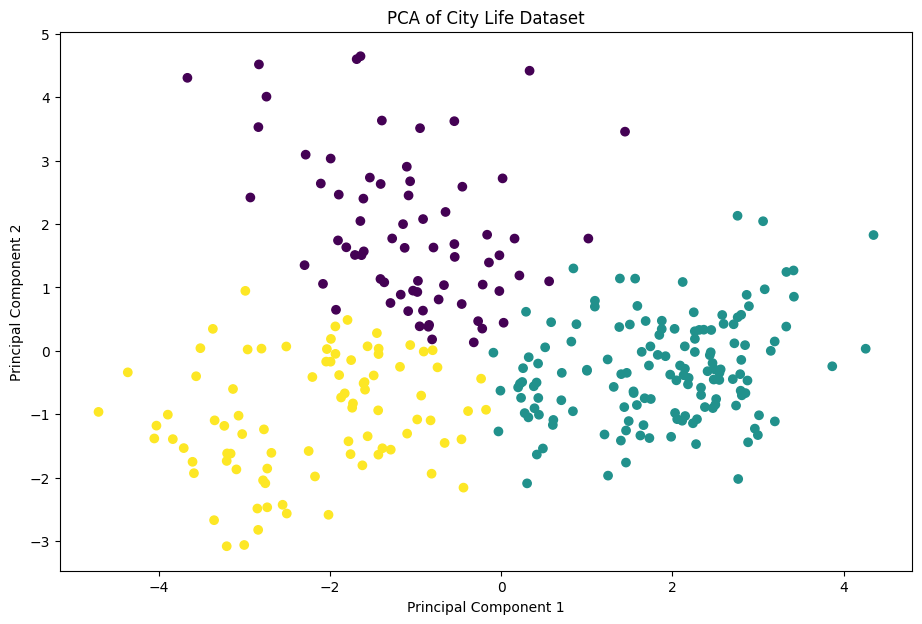

In [17]:
# Plot the reduced dataset
plt.figure(figsize=(11, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of City Life Dataset')
#plt.legend(labels=data.target_names)
plt.show()


In [18]:
import pandas as pd

loadings = pd.DataFrame(
    pca.components_.T,
    index=df1.columns,
    columns=['PC1', 'PC2']
)

loadings


,PC1,PC2
population_density,-0.176986,0.574718
avg_income,0.452965,0.144767
internet_penetration,0.407390,0.185860
avg_rent,0.440567,0.135761
air_quality_index,-0.329965,0.373182
public_transport_score,0.264291,0.427516
happiness_score,0.462680,-0.077554
green_space_ratio,0.103120,-0.517414


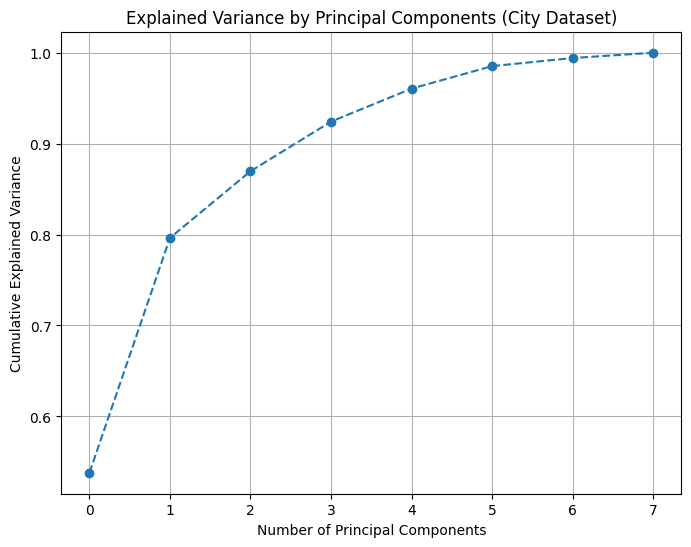

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# df1 is already standardized from your earlier StandardScaler step
X_scaled = df1

# Fit PCA with all components
pca_full = PCA()
pca_full.fit(X_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components (City Dataset)')
plt.grid(True)
plt.show()


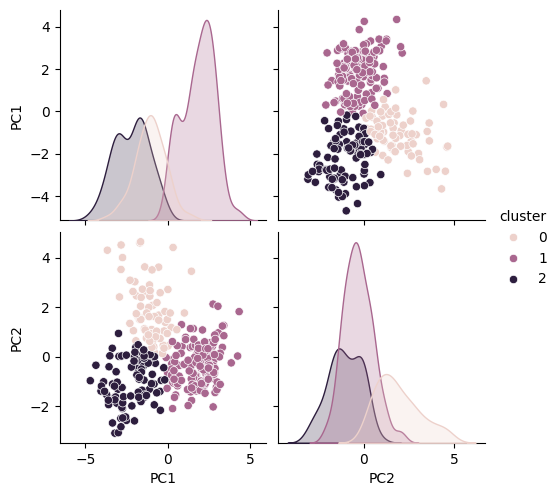

In [21]:
df_pca = pd.DataFrame(
    X_reduced,
    columns=['PC1', 'PC2']
)
df_pca['cluster'] = clusters

import seaborn as sb
sb.pairplot(df_pca, hue='cluster')
plt.show()
